Import libraries

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from metrics import print_evaluation_metrics

Load dataset and prepare df

In [2]:
file_path = "../data/WHO-COVID-19-global-data.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column]]

df.set_index(date_column, inplace=True)
df = df.groupby(date_column).sum().reset_index()

df = df.dropna()

Train test split

In [3]:
train = df.iloc[:-30]
test = df.iloc[-30:]

Parameter tuning for order

In [4]:
stepwise_fit = auto_arima(df[target_column], trace=True, suppress_warnings=True)
best_order = stepwise_fit.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26516.485, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27445.059, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27050.750, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26546.061, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27443.060, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26499.368, Time=3.67 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=26552.169, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26544.146, Time=1.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26515.155, Time=3.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=26526.259, Time=1.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26564.158, Time=0.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26398.837, Time=4.59 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26394.258, Time=4.85 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26471.171, Time=2.92 sec
 ARIMA(4,1,3)(0,0,0

Create Model

In [5]:
model = ARIMA(train[target_column], order=best_order)
model = model.fit()
model.summary()

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                 1390
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -12780.726
Date:                Sun, 26 Nov 2023   AIC                          25583.453
Time:                        15:17:53   BIC                          25641.052
Sample:                             0   HQIC                         25604.993
                               - 1390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3263      0.035      9.290      0.000       0.257       0.395
ar.L2         -1.0673      0.033    -32.819      0.000      -1.131      -1.004
ar.L3          0.1453      0.043      3.376      0.001       0.061       0.230
ar.L4         -0.6107      0.031    -19.829      0.000      -0.671      -0.550
ar.L5         -0.4333      0.028    -15.699      0.000      -0.487      -0.379
ma.L1         -1.3843      0.036    -38.041      0.000      -1.456      -1.313
ma.L2          1.7049      0.052     32.979      0.000       1.604       1.806
ma.L3         -1.5462      0.052    -29.833      0.000      -1.648      -1.445
ma.L4          1.2192      0.037     32.817      0.000       1.146       1.292
ma.L5         -0.5593      0.027    -21.070      0.000      -0.611      -0.507
sigma2      8.705e+06   5.66e+04    153.706      0.000    8.59e+06    8.82e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):           5847652.27
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                            12.36
Prob(H) (two-sided):                  0.00   Kurtosis:                       319.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Plot the result

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

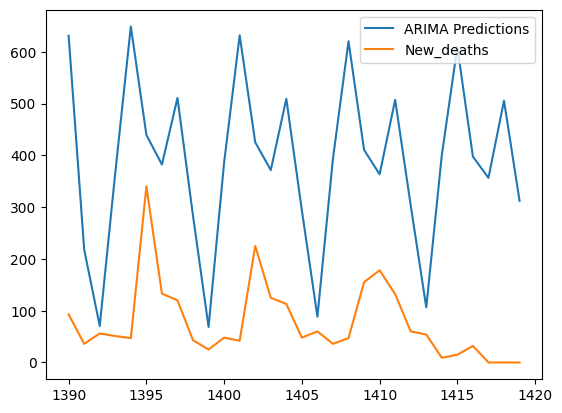

In [6]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ="levels").rename("ARIMA Predictions")
pred.plot(legend=True)
test[target_column].plot(legend=True)

RMSE of the result

In [7]:
print_evaluation_metrics(pred, test[target_column])

Evaluation Metrics:
MSE: 124271.75
RMSE: 352.52
MAE: 309.57
MAPE: inf
SMAPE: 129.74
